In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from wordcloud import WordCloud

In [4]:
## Reading csv file
data_df1=pd.read_csv('/content/drive/My Drive/Capstone/sample30.csv')

In [5]:
data_df1.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


In [6]:
data_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [7]:
## Dimension of dataframe
data_df1.shape

(30000, 15)

**DATA CLEANING**

In [8]:
## Removing duplicates 
data_df=data_df1.drop_duplicates()

In [9]:
## Checking for null values and datatypes
data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [10]:
## Percentage of null values
(data_df.isnull().sum()/data_df.shape[0]).sort_values(ascending=False)*100

reviews_userProvince    99.433333
reviews_userCity        93.570000
reviews_didPurchase     46.893333
reviews_doRecommend      8.566667
reviews_title            0.633333
manufacturer             0.470000
reviews_username         0.210000
reviews_date             0.153333
user_sentiment           0.003333
id                       0.000000
brand                    0.000000
categories               0.000000
name                     0.000000
reviews_rating           0.000000
reviews_text             0.000000
dtype: float64

In [11]:
## Creating new dataframe for sentiment prediction
new_df=data_df[['id','reviews_title','user_sentiment','reviews_text']]

In [12]:
new_df.shape

(30000, 4)

In [13]:
## Drop null rows from dataframe
new_df=new_df.dropna(axis=0)

In [14]:
new_df.isnull().sum()

id                0
reviews_title     0
user_sentiment    0
reviews_text      0
dtype: int64

In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29809 entries, 0 to 29999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              29809 non-null  object
 1   reviews_title   29809 non-null  object
 2   user_sentiment  29809 non-null  object
 3   reviews_text    29809 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [16]:
new_df.shape[0]/data_df.shape[0]

0.9936333333333334

We have retained nearly 99% of the original data for modelling after performing the missing value treatment

In [17]:
new_df.head()

,id,reviews_title,user_sentiment,reviews_text
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,Positive,i love this album. it's very good. more to the...
1,AV14LG0R-jtxr-f38QfS,Good,Positive,Good flavor. This review was collected as part...
2,AV14LG0R-jtxr-f38QfS,Good,Positive,Good flavor.
3,AV16khLE-jtxr-f38VFn,Disappointed,Negative,I read through the reviews on here before look...
4,AV16khLE-jtxr-f38VFn,Irritation,Negative,My husband bought this gel for us. The gel cau...


In [18]:
## Combining reviews title and text in one column
new_df['reviews_combined']=new_df['reviews_title']+' '+new_df['reviews_text']

In [19]:
new_df.head()

,id,reviews_title,user_sentiment,reviews_text,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,Positive,i love this album. it's very good. more to the...,Just Awesome i love this album. it's very good...
1,AV14LG0R-jtxr-f38QfS,Good,Positive,Good flavor. This review was collected as part...,Good Good flavor. This review was collected as...
2,AV14LG0R-jtxr-f38QfS,Good,Positive,Good flavor.,Good Good flavor.
3,AV16khLE-jtxr-f38VFn,Disappointed,Negative,I read through the reviews on here before look...,Disappointed I read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,Irritation,Negative,My husband bought this gel for us. The gel cau...,Irritation My husband bought this gel for us. ...


**EDA**

Distribution of ratings

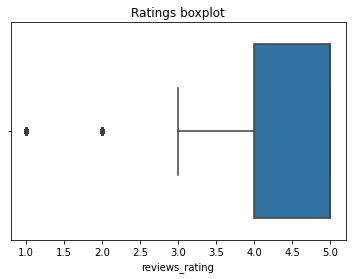

In [20]:
## Visualizing ratings distribution using box plot
plt.title("Ratings boxplot")
sns.boxplot(data_df.reviews_rating)
plt.show()

Boxplot shows that the ratings of the users range between 3 and 5

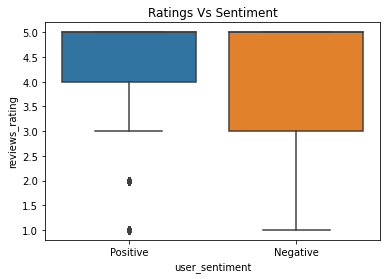

In [21]:
## Checking user sentiment against ratings
plt.title('Ratings Vs Sentiment')
sns.boxplot(data=data_df,y='reviews_rating',x='user_sentiment')
plt.show()

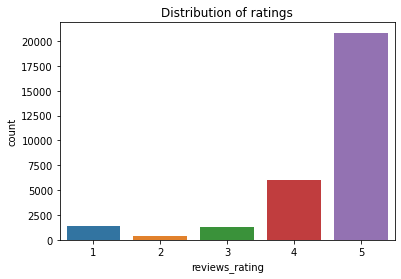

In [22]:
## Countplot for ratings
sns.countplot(data_df.reviews_rating)
plt.title("Distribution of ratings")
plt.show()

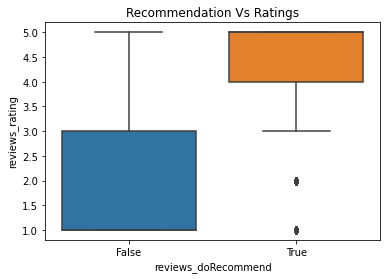

In [23]:
## Checking the recommendation status against ratings
plt.title('Recommendation Vs Ratings')
sns.boxplot(data=data_df,y='reviews_rating',x='reviews_doRecommend')
plt.show()

**Text Preprocessing**

In [24]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
import re
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
from tqdm import tqdm
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [27]:
## Initializing lemmatizer
lemmatizer=WordNetLemmatizer()
## Converting the text into lower case
new_df['reviews_combined']=new_df['reviews_combined'].apply(lambda x: str(x).lower())
new_df['user_sentiment']=new_df['user_sentiment'].apply(lambda x: str(x).lower())


In [28]:
## Method to remove punctuations from the text
def remove_punct(text):
  punc_chars = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  no_punct = ""
  for char in text:
   if char not in punc_chars:
      no_punct = no_punct + char
  return no_punct

new_df['reviews_combined'] = new_df['reviews_combined'].apply(remove_punct)
new_df.head()

,id,reviews_title,user_sentiment,reviews_text,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,positive,i love this album. it's very good. more to the...,just awesome i love this album its very good m...
1,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor. This review was collected as part...,good good flavor this review was collected as ...
2,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,Disappointed,negative,I read through the reviews on here before look...,disappointed i read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,Irritation,negative,My husband bought this gel for us. The gel cau...,irritation my husband bought this gel for us t...


In [29]:
## Removing number values from the text
def remove_digits(sentence):
  return (re.sub('\d+','',sentence))


new_df['reviews_combined'] = new_df['reviews_combined'].apply(remove_digits)
new_df.head()

,id,reviews_title,user_sentiment,reviews_text,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,positive,i love this album. it's very good. more to the...,just awesome i love this album its very good m...
1,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor. This review was collected as part...,good good flavor this review was collected as ...
2,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,Disappointed,negative,I read through the reviews on here before look...,disappointed i read through the reviews on her...
4,AV16khLE-jtxr-f38VFn,Irritation,negative,My husband bought this gel for us. The gel cau...,irritation my husband bought this gel for us t...


In [30]:
stop_words=stopwords.words('english')

## Removing text with single characters as it adds no value to the analysis
def remove_charsingle(text):
  words = word_tokenize(text)
  lengthy_words = []
  for word in words:
    if len(word) > 1:
      lengthy_words.append(word)
  return " ".join(lengthy_words)

In [31]:
## remove single character words
new_df['reviews_combined'] = new_df['reviews_combined'].apply(remove_charsingle)
new_df.head()

,id,reviews_title,user_sentiment,reviews_text,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,positive,i love this album. it's very good. more to the...,just awesome love this album its very good mor...
1,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor. This review was collected as part...,good good flavor this review was collected as ...
2,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,Disappointed,negative,I read through the reviews on here before look...,disappointed read through the reviews on here ...
4,AV16khLE-jtxr-f38VFn,Irritation,negative,My husband bought this gel for us. The gel cau...,irritation my husband bought this gel for us t...


In [32]:
## Removing stop words
def stopword_removal(sentence): 
  word_list=[]
  wrd_tokenize=word_tokenize(sentence)
  word_list=[word for word in wrd_tokenize if word not in stop_words]

  return (" ".join(word_list))
 

In [33]:
new_df['reviews_combined'] = new_df['reviews_combined'].apply(stopword_removal)
new_df.head()

,id,reviews_title,user_sentiment,reviews_text,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,positive,i love this album. it's very good. more to the...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor. This review was collected as part...,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,Disappointed,negative,I read through the reviews on here before look...,disappointed read reviews looking buying one c...
4,AV16khLE-jtxr-f38VFn,Irritation,negative,My husband bought this gel for us. The gel cau...,irritation husband bought gel us gel caused ir...


In [34]:
## Applying lemmatizer on the text
def lemmatizing_words(sentence):
  lemma_words=[lemmatizer.lemmatize(word) for word in word_tokenize(sentence)]
  return " ".join(lemma_words)

In [35]:
new_df['reviews_combined']=new_df['reviews_combined'].apply(lemmatizing_words)

In [36]:
new_df['reviews_combined'][0]

'awesome love album good hip hop side current pop sound hype listen everyday gym give star rating way metaphor crazy'

In [37]:
## To generate word cloud for the processed text
def generate_wordcloud(text):
  wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(text)
  # plot the WordCloud image                       
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)  
  plt.show()

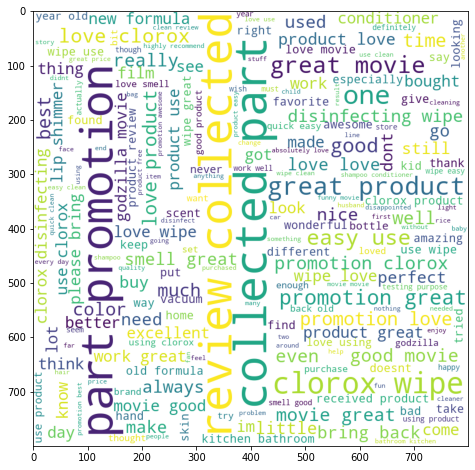

In [38]:
generate_wordcloud(" ".join(new_df['reviews_combined']))

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
## Using tfidf to convert text to features
tfidf=TfidfVectorizer()

In [41]:
## Fitting on tfidf 
tfidf_fit=tfidf.fit(new_df['reviews_combined'])
final_tfidf=tfidf_fit.transform(new_df['reviews_combined'])

**MODEL BUILDING**

**Logistic Regression**

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
## Assigning X and Y values for splitting
X=final_tfidf
y=new_df['user_sentiment']

In [44]:
## Splitting as training and test datasets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30)

In [45]:
## Verifying the dimensions of train and test data
X_train.shape,X_test.shape

((20866, 19335), (8943, 19335))

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

**SMOTE**

In [47]:
## Performing standard scaling on the split data
smote=SMOTE(random_state=0)
X_train_smote,y_train_smote=smote.fit_resample(X_train,y_train)

In [48]:
## Importing the necessary packages
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [49]:
## Logistic regression initialization
logreg_model_x=LogisticRegression(random_state=42)
logreg_model_x.fit(X_train_smote,y_train_smote)

LogisticRegression(random_state=42)

In [50]:
##predicting logreg model on train data
y_train_pred=logreg_model_x.predict(X_train_smote)

In [51]:
print("Accuracy score on train data using Logistic Regression:",metrics.accuracy_score(y_train_smote,y_train_pred))

Accuracy score on train data using Logistic Regression: 0.9367321534881203


In [52]:
## Predicting logreg model on test data
y_test_pred=logreg_model_x.predict(X_test)
print("Accuracy score on test data using Logistic Regression:",metrics.accuracy_score(y_test,y_test_pred))

Accuracy score on test data using Logistic Regression: 0.8617913451861792


*Logistic regression with default parameters results in the accuracy of train (0.93) and test (0.87)*

In [53]:
pd.DataFrame(metrics.classification_report(y_test,y_test_pred,output_dict=True))
             

,negative,positive,accuracy,macro avg,weighted avg
precision,0.420182,0.969537,0.861791,0.694860,0.910811
recall,0.770921,0.872668,0.861791,0.821794,0.861791
f1-score,0.543911,0.918556,0.861791,0.731234,0.878506
support,956.000000,7987.000000,0.861791,8943.000000,8943.000000


In [54]:
logreg_model=LogisticRegression(random_state=42)

In [55]:
params={'penalty':['l1','l2'],
        'max_iter':[120,150],
        'solver':['liblinear']}

In [56]:
## Applying gridsearchCV on the chosen params to tune the parameters
gridsearch=GridSearchCV(logreg_model,params,n_jobs=-1,cv=3,verbose=10)

In [57]:
## fitting on the given parameters
gridsearch.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'max_iter': [120, 150], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             verbose=10)

In [58]:
## Identifying the best params
gridsearch.best_params_

{'max_iter': 120, 'penalty': 'l2', 'solver': 'liblinear'}

In [59]:
## Using class weight is balanced to avoid imbalance in the data training
logreg_model=LogisticRegression(max_iter=120,penalty='l2',solver='liblinear',random_state=42)

In [60]:
logreg_model=logreg_model.fit(X_train_smote,y_train_smote)

In [61]:
## Predicting on the train data
y_train_pred=logreg_model.predict(X_train_smote)

In [62]:
print("Accuracy score on logistic regression train data after hyper parameter tuning: ",metrics.accuracy_score(y_train_smote,y_train_pred))

Accuracy score on logistic regression train data after hyper parameter tuning:  0.9367321534881203


In [63]:
## confusion matrix on tuned model
print("Confusion Matrix of logistic regression train data \n",metrics.confusion_matrix(y_train_smote,y_train_pred))

Confusion Matrix of logistic regression train data 
 [[17864   613]
 [ 1725 16752]]


In [64]:
## Predicting on the test data
y_test_pred=logreg_model.predict(X_test)

In [65]:
print("Accuracy score of logistic regression test data after hyperparameter tuning : ",metrics.accuracy_score(y_test,y_test_pred))

Accuracy score of logistic regression test data after hyperparameter tuning :  0.8617913451861792


In [66]:
pd.DataFrame(metrics.classification_report(y_test,y_test_pred,output_dict=True))

,negative,positive,accuracy,macro avg,weighted avg
precision,0.420182,0.969537,0.861791,0.694860,0.910811
recall,0.770921,0.872668,0.861791,0.821794,0.861791
f1-score,0.543911,0.918556,0.861791,0.731234,0.878506
support,956.000000,7987.000000,0.861791,8943.000000,8943.000000


*Logistic regression with hyper parameter tuning results in the accuracy of train (0.93) and test (0.87) and the precision and recall values also seem to be balanced*

**RandomForest Classifier**

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [68]:
## Using class weight as balanced to deal with imbalance
random_classifier=RandomForestClassifier(random_state=42)

In [69]:
## Fitting on train data
random_classifier.fit(X_train_smote,y_train_smote)

RandomForestClassifier(random_state=42)

In [70]:
## Predicting the train
y_train_pred=random_classifier.predict(X_train_smote)

In [71]:
print("Accuracy score of random forest classifier on train data: ",metrics.accuracy_score(y_train_smote,y_train_pred))

Accuracy score of random forest classifier on train data:  1.0


In [72]:
pd.DataFrame(metrics.classification_report(y_train_smote,y_train_pred,output_dict=True))

,negative,positive,accuracy,macro avg,weighted avg
precision,1.0,1.0,1.0,1.0,1.0
recall,1.0,1.0,1.0,1.0,1.0
f1-score,1.0,1.0,1.0,1.0,1.0
support,18477.0,18477.0,1.0,36954.0,36954.0


In [73]:
## Predicting on the test data
y_test_pred=random_classifier.predict(X_test)

In [74]:
print("Accuracy score of random forest classifier on the test data : ",metrics.accuracy_score(y_test,y_test_pred))

Accuracy score of random forest classifier on the test data :  0.90349994409035


In [75]:
pd.DataFrame(metrics.classification_report(y_test,y_test_pred,output_dict=True))

,negative,positive,accuracy,macro avg,weighted avg
precision,0.572543,0.929053,0.9035,0.750798,0.890943
recall,0.383891,0.965694,0.9035,0.674793,0.903500
f1-score,0.459612,0.947019,0.9035,0.703316,0.894916
support,956.000000,7987.000000,0.9035,8943.000000,8943.000000


*Random Forest Classifier with balanced class results in train(0.99) and test(0.90) accuracy with a considerable f1-score*

In [76]:
params={ 'min_samples_split':[5,10],
      'n_estimators':[100,150]}

In [77]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
random_classifier=RandomForestClassifier(random_state=42)

In [79]:
## Hyperparameter tuning on the train datA
grid_search=GridSearchCV(random_classifier,params,n_jobs=-1,cv=3,verbose=1)

In [80]:
#### Fitting on the parameters specified
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'min_samples_split': [5, 10],
                         'n_estimators': [100, 150]},
             verbose=1)

In [81]:
## Identifying the best parameters
grid_search.best_params_

{'min_samples_split': 5, 'n_estimators': 150}

In [82]:
## Building random forest classifier on the tuned parameters
rf_classifier=RandomForestClassifier(random_state=42,min_samples_split=5,n_estimators= 150)

In [83]:
rf_classifier=rf_classifier.fit(X_train_smote,y_train_smote)

In [84]:
##Predicting on the train data
y_train_pred=rf_classifier.predict(X_train_smote)

In [85]:
print("Accuracy score of random forest after tuning on the train data: ", metrics.accuracy_score(y_train_smote,y_train_pred))

Accuracy score of random forest after tuning on the train data:  0.9999729393299778


In [86]:
## Predicting on the test data
y_test_pred=rf_classifier.predict(X_test)

In [87]:
print("Accuracy score of random forest classifier on the test data after tuning ",metrics.accuracy_score(y_test,y_test_pred))

Accuracy score of random forest classifier on the test data after tuning  0.9000335457900034


In [88]:
pd.DataFrame(metrics.classification_report(y_test,y_test_pred,output_dict=True))

,negative,positive,accuracy,macro avg,weighted avg
precision,0.545858,0.928995,0.900034,0.737426,0.888038
recall,0.385983,0.961563,0.900034,0.673773,0.900034
f1-score,0.452206,0.944998,0.900034,0.698602,0.892319
support,956.000000,7987.000000,0.900034,8943.000000,8943.000000


Random forest classifier with hyper parameter tuning gives 99% train accuracy and 90% test accuracy

**Naive Bayes**

In [89]:
from sklearn.naive_bayes import MultinomialNB

In [90]:
# 4. Naive bayes
naive = MultinomialNB()

naive.fit(X_train_smote, y_train_smote)
y_train_pred=naive.predict(X_train_smote)
print("Accuracy score on train data using naive bayes",metrics.accuracy_score(y_train_smote,y_train_pred))

Accuracy score on train data using naive bayes 0.8862369432267143


In [91]:
## predictting on test data
y_test_pred = naive.predict(X_test)
print("Accuracy score on test data using naive bayes",metrics.accuracy_score(y_test,y_test_pred))
print(metrics.classification_report(y_test, y_test_pred))

Accuracy score on test data using naive bayes 0.8294755674829476
              precision    recall  f1-score   support

    negative       0.34      0.61      0.43       956
    positive       0.95      0.86      0.90      7987

    accuracy                           0.83      8943
   macro avg       0.64      0.73      0.67      8943
weighted avg       0.88      0.83      0.85      8943



*Naive bayes results in train(0.89) and test(0.82) accuracy*

***Out of the three models built, logistic regression with hyperparameter tuning performs well with train and test accuracy  score. Recall and f1-score for positive and negative sentiments also seem to give good results compared to other models built, hence choosing this model***

**RECOMMENDATION SYSTEM**

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
data_df[['id','reviews_rating','reviews_username']]

,id,reviews_rating,reviews_username
0,AV13O1A8GV-KLJ3akUyj,5,joshua
1,AV14LG0R-jtxr-f38QfS,5,dorothy w
2,AV14LG0R-jtxr-f38QfS,5,dorothy w
3,AV16khLE-jtxr-f38VFn,1,rebecca
4,AV16khLE-jtxr-f38VFn,1,walker557
...,...,...,...
29995,AVpfW8y_LJeJML437ySW,5,laurasnchz
29996,AVpfW8y_LJeJML437ySW,5,scarlepadilla
29997,AVpfW8y_LJeJML437ySW,5,liviasuexo
29998,AVpfW8y_LJeJML437ySW,5,ktreed95


In [94]:
## creating a dataframe for recommendation
recommendation_df=data_df[['id','reviews_username','reviews_rating']]

In [95]:
recommendation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                30000 non-null  object
 1   reviews_username  29937 non-null  object
 2   reviews_rating    30000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [96]:
## removing null values from recommendation dataframe
recommendation_df=recommendation_df.dropna(axis=0)

In [97]:
recommendation_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29937 non-null  object
 1   reviews_username  29937 non-null  object
 2   reviews_rating    29937 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 935.5+ KB


In [98]:
recommendation_df.head()

,id,reviews_username,reviews_rating
0,AV13O1A8GV-KLJ3akUyj,joshua,5
1,AV14LG0R-jtxr-f38QfS,dorothy w,5
2,AV14LG0R-jtxr-f38QfS,dorothy w,5
3,AV16khLE-jtxr-f38VFn,rebecca,1
4,AV16khLE-jtxr-f38VFn,walker557,1


In [99]:
## splitting into train and test on recommendation dataframe
train_rating,test_rating=train_test_split(recommendation_df,test_size=0.3,random_state=42)

In [100]:
## Creating pivot table with the required fields
df_pivot=train_rating.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean').fillna(0)

In [101]:
df_pivot

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zxjki,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zyiah4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Dummy train and dummy test**

In [102]:
## creating dummy train dataframe
dummy_train =train_rating.copy()

In [103]:
dummy_train

,id,reviews_username,reviews_rating
962,AV1YGDqsGV-KLJ3adc-O,brittney w,5
10463,AVpf3VOfilAPnD_xjpun,cjshrad,5
25385,AVpfPaoqLJeJML435Xk9,zman69,5
27096,AVpfrFDZLJeJML43Bmv0,misunshyne,5
24007,AVpfPaoqLJeJML435Xk9,matanovatos,4
...,...,...,...
29865,AVpfW8y_LJeJML437ySW,melonball,5
5412,AVpf0pfrilAPnD_xi6s_,noah a,5
860,AV1YGDqsGV-KLJ3adc-O,joli89,5
15837,AVpf63aJLJeJML43F__Q,iceness,4


In [104]:
## Replacing the non-null ratings with zero and null/zero value ratings to one to predict unknowwn ratings
dummy_train['reviews_rating'].apply(lambda x:0 if x>=1 else 1)

962      0
10463    0
25385    0
27096    0
24007    0
        ..
29865    0
5412     0
860      0
15837    0
23706    0
Name: reviews_rating, Length: 20955, dtype: int64

In [105]:
## Creating dummy_train pivot table
dummy_train=dummy_train.pivot_table(index='reviews_username',columns='id',values='reviews_rating').fillna(1)

In [106]:
dummy_train.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01impala,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02dakota,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
02deuce,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0325home,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [107]:
## Identifying unique indices
df_pivot.index.nunique()

18275

In [108]:
from sklearn.metrics.pairwise import pairwise_distances

In [109]:
## Finding the cosine similarity
user_corr=1-pairwise_distances(df_pivot,metric='cosine')

In [110]:
## Replacing null values in dataframe to zero
user_corr[np.isnan(user_corr)]=0

In [111]:
user_corr

array([[1.       , 0.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.9486833, 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [112]:
user_corr.shape

(18275, 18275)

**Adjusted Cosine**

In [113]:
## creating pivot table on traing ratings dataframe
df_pivot=train_rating.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean')

In [114]:
df_pivot.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
## Finding out the mean neglecting the null values
mean_nan=np.nanmean(df_pivot,axis=1)
mean_nan

array([2., 3., 5., ..., 5., 5., 4.])

In [116]:
## SUbtract train ratings df with mean dataframe
df_subtracted=(df_pivot.T-mean_nan).T
df_subtracted

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01impala,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02dakota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02deuce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0325home,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zxcsdfd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zxjki,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zyiah4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
## Applying the mean subtracted value on cosine similarity
user_corr_adj=1-pairwise_distances(df_subtracted.fillna(0),metric='cosine')
user_corr_adj

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [118]:
#replacing null values with 0 
user_corr_adj[np.isnan(user_corr_adj)]=0

In [119]:
## Replacing values less than zero to also zero
user_corr_adj[user_corr_adj<0]=0

In [120]:
user_corr_adj

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [121]:
## performing dot product on adjusted cosine matrix with train rating df
user_predicted_ratings=np.dot(user_corr_adj,df_pivot.fillna(0))
user_predicted_ratings

array([[0.        , 0.        , 2.5       , ..., 1.46525748, 1.88982237,
        0.20412415],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [122]:
user_predicted_ratings.shape

(18275, 256)

In [123]:
## Multiplying predicted rating with dummy train to get the unkown rating values
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,2.5,3.596262,0.0,0.0,0.0,0.0,2.581989,1.018079,...,1.666667,0.188982,0.0,0.0,0.0,0.0,0.0,1.465257,1.889822,0.204124
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
02deuce,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
0325home,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


**User-User evaluation**

In [124]:
## Evaluating on the test rating data
common=test_rating[test_rating.reviews_username.isin(train_rating.reviews_username)]

In [125]:
common.head()

,id,reviews_username,reviews_rating
12875,AVpf3VOfilAPnD_xjpun,jessica,5
21657,AVpfm8yiLJeJML43AYyu,romance318,1
23320,AVpfPaoqLJeJML435Xk9,countprice,3
21505,AVpfm8yiLJeJML43AYyu,farbar,1
29216,AVpfW8y_LJeJML437ySW,baronesscountess,4


In [126]:
common.shape

(2051, 3)

In [127]:
## Creating pivot table on test data
common_user_matrix=common.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean')

In [128]:
common_user_matrix.head()

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1234567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123charlie,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1witch,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
## converting adjusted cosine data to df
user_corr_df=pd.DataFrame(user_corr_adj)
user_corr

array([[1.       , 0.       , 0.       , ..., 0.       , 0.9486833,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 1.       , 1.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ],
       [0.9486833, 0.       , 0.       , ..., 0.       , 1.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 1.       , 0.       ,
        1.       ]])

In [130]:
df_subtracted.head(1)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
## Assinging the index of user correlated matrix
user_corr_df['username']=df_subtracted.index
user_corr_df.set_index('username',inplace=True)
user_corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,18265,18266,18267,18268,18269,18270,18271,18272,18273,18274
username,,,,,,,,,,,,,,,,,,,,,
00sab00,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01impala,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02dakota,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02deuce,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0325home,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
common.head(1)

,id,reviews_username,reviews_rating
12875,AVpf3VOfilAPnD_xjpun,jessica,5


In [133]:
## Assigning columns to user correlated df
list_name=common.reviews_username.to_list()
user_corr_df.columns=df_subtracted.index.to_list()

In [134]:
## Cross checking the index 
user_corr_df1=user_corr_df[user_corr_df.index.isin(list_name)]

In [135]:
user_corr_df1.head()

,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
user_corr_df2=user_corr_df1.T[user_corr_df1.T.index.isin(list_name)]

In [137]:
user_corr_df3=user_corr_df2.T

In [138]:
user_corr_df3.head()

,1234,1234567,123charlie,1943,1witch,4 rooms 1 dog lotsa fur,85lisa,a hutch,aac06002,aalyah,...,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
user_corr_df3[user_corr_df3<0]=0
user_corr_df3

,1234,1234567,123charlie,1943,1witch,4 rooms 1 dog lotsa fur,85lisa,a hutch,aac06002,aalyah,...,xavier,yamel97,yayawomack,yorkielvr,yummy,yvonne,zach,zebras,zippy,zxcsdfd
username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
123charlie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1943,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1witch,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
yvonne,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zach,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
zebras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [140]:
## Applying dot product on the train data and ratings
common_user_predicted_ratings=np.dot(user_corr_df3,common_user_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [141]:
## Creating dummy test
dummy_test=common.copy()
dummy_test

,id,reviews_username,reviews_rating
12875,AVpf3VOfilAPnD_xjpun,jessica,5
21657,AVpfm8yiLJeJML43AYyu,romance318,1
23320,AVpfPaoqLJeJML435Xk9,countprice,3
21505,AVpfm8yiLJeJML43AYyu,farbar,1
29216,AVpfW8y_LJeJML437ySW,baronesscountess,4
...,...,...,...
3735,AVpe7sl91cnluZ0-aI1Y,mary,5
19865,AVpfJP1C1cnluZ0-e3Xy,ladybug244,5
22657,AVpfOmKwLJeJML435GM7,jerri,5
20110,AVpfJP1C1cnluZ0-e3Xy,lynz0201,5


In [142]:
## assinging known rating to one and unknown to zero
dummy_test['reviews_rating'].apply(lambda x:1 if x>=1 else 0) 
dummy_test=dummy_test.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean').fillna(0)

In [143]:
## Multiplying ratings with dummy test
common_user_predicted_ratings=np.multiply(common_user_predicted_ratings,dummy_test)

In [144]:
common_user_predicted_ratings.head(2)

id,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1YneDPglJLPUi8IJyQ,AV1Ys0kTvKc47QAVgx1C,AV1YtGjdglJLPUi8IOfJ,AV1ZT7GLglJLPUi8IQLI,...,AVpfov9TLJeJML43A7B0,AVpfpM2yilAPnD_xfmDG,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrgjFLJeJML43BvCc,AVpfs0tUilAPnD_xgqN2,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS
reviews_username,,,,,,,,,,,,,,,,,,,,,
1234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1234567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Calculating RMSE for the movies rated by the user**

In [145]:
from sklearn.preprocessing import MinMaxScaler
from numpy import * 

In [147]:
##Assigning final predicting ratings to X
X=common_user_predicted_ratings.copy()

In [148]:
## Using only the ratings value greater than zero
X=X[X>0]

In [149]:
## Scaling between the range 1-5
scaler=MinMaxScaler(feature_range=(1,5))

In [150]:
## Fitting and transforming on X
scaler.fit(X)
y=scaler.transform(X)
print(y)

[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [151]:
## Creating pivot table for train data
common_=common.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean')

In [152]:
## Finding total non-NaN values
total_non_nan=np.count_nonzero(~np.isnan(y))

In [153]:
## Calculating rmse on user-user prediction
rmse=(sum(sum((common_-y)**2))/total_non_nan)**0.5
print(rmse)

2.3444146791650273


RMSE for user-user similarity turns out to be 2.3444

**Item-item based similarity**

In [154]:
## pivot table on train data
df_pivot=train_rating.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean').T
df_pivot.head(3)

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
##  subtracting mean from the train rating
mean=np.nanmean(df_pivot,axis=1)
df_subtracted=(df_pivot.T-mean).T
df_subtracted.head()

reviews_username,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,08dallas,09mommy11,1.11E+24,1085,...,zsarah,zsazsa,zubb,zuttle,zwithanx,zxcsdfd,zxjki,zyiah4,zzdiane,zzz1127
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV14LG0R-jtxr-f38QfS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV16khLE-jtxr-f38VFn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YGDqsGV-KLJ3adc-O,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AV1YIch7GV-KLJ3addeG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [156]:
## Obtaining adjusted cosine similarity on item-item matrix
item_corr=1-pairwise_distances(df_subtracted.fillna(0),metric='cosine')
item_corr[np.isnan(item_corr)]=0
item_corr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [157]:
item_corr[item_corr<0]=0

In [158]:
## Performing dot product on train data and item correlation 
item_corr_ratings=np.dot(df_pivot.fillna(0).T,item_corr)
item_corr_ratings

array([[0.        , 0.        , 0.        , ..., 0.00603917, 0.06485571,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.0094556 ],
       [0.        , 0.        , 0.        , ..., 0.00781596, 0.10809285,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.00756448]])

In [159]:
item_corr_ratings.shape

(18275, 256)

In [160]:
dummy_train.shape

(18275, 256)

In [161]:
## Multiply dummy train and the final ratings
final_item_rating=np.multiply(dummy_train,item_corr_ratings)
final_item_rating.shape


(18275, 256)

In [162]:
final_item_rating.head(3)

id,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
reviews_username,,,,,,,,,,,,,,,,,,,,,
00sab00,0.0,0.0,0.0,0.006042,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.020509,0.006039,0.064856,0.0
01impala,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.097645,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0
02dakota,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.162741,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0


**Evaluation of item-item similarity**

In [163]:
## Obtaining the test data
common=test_rating[test_rating.id.isin(train_rating.id)]
common.head()

,id,reviews_username,reviews_rating
25787,AVpfPaoqLJeJML435Xk9,youknowhowitgoes,5
12627,AVpf3VOfilAPnD_xjpun,ashleydale00,5
15778,AVpf63aJLJeJML43F__Q,angie1108,3
1138,AV1YmDL9vKc47QAVgr7_,falisha,5
12875,AVpf3VOfilAPnD_xjpun,jessica,5


In [164]:
item_corr_df=pd.DataFrame(item_corr)

In [165]:
## Pivot table creation on the required fields
common_matrix=common.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean').T

In [166]:
## Assinging index to the item correlation df
item_corr_df['id']=df_subtracted.index
item_corr_df.set_index('id',inplace=True)
item_corr_df.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
list_name=common.id.to_list()

In [168]:
## Assigning columns to item correlation df
item_corr_df.columns=df_subtracted.index.to_list()
item_corr_df

,AV13O1A8GV-KLJ3akUyj,AV14LG0R-jtxr-f38QfS,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YIch7GV-KLJ3addeG,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,...,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfsQoeilAPnD_xgfx5,AVpfshNsLJeJML43CB8q,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV13O1A8GV-KLJ3akUyj,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV14LG0R-jtxr-f38QfS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV16khLE-jtxr-f38VFn,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YIch7GV-KLJ3addeG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfshNsLJeJML43CB8q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfthSailAPnD_xg3ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AVpftikC1cnluZ0-p31V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [169]:
##Checking for the presence of index in the train data
item_corr_df1=item_corr_df[item_corr_df.index.isin(list_name)]

In [170]:
item_corr_df2=item_corr_df1.T[item_corr_df1.T.index.isin(list_name)]

In [171]:
item_corr_df3=item_corr_df2.T

In [172]:
item_corr_df3.head()

,AV16khLE-jtxr-f38VFn,AV1YGDqsGV-KLJ3adc-O,AV1YlENIglJLPUi8IHsX,AV1YmBrdGV-KLJ3adewb,AV1YmDL9vKc47QAVgr7_,AV1Ymf_rglJLPUi8II2v,AV1Yn94nvKc47QAVgtst,AV1Ynb3bglJLPUi8IJxJ,AV1YneDPglJLPUi8IJyQ,AV1YqAaMGV-KLJ3adiDj,...,AVpfqW4WilAPnD_xf7a_,AVpfr5cb1cnluZ0-pZFp,AVpfrFDZLJeJML43Bmv0,AVpfrTyiLJeJML43BrSI,AVpfrfHF1cnluZ0-pRai,AVpfrgjFLJeJML43BvCc,AVpfthSailAPnD_xg3ON,AVpftikC1cnluZ0-p31V,AVpfv4TlilAPnD_xhjNS,AVpfvieo1cnluZ0-qdnu
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.108098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [173]:
item_corr_df3[item_corr_df3<0]=0

In [174]:
## Applying dot product on item correlation df and common matrix
item_predicted_ratings=np.dot(item_corr_df3,common_matrix.fillna(0))
item_predicted_ratings

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.34691174e-02, 3.00000000e+00, 6.62104097e-03, ...,
        0.00000000e+00, 5.16904870e-03, 8.22214474e-05],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 9.45559849e-03]])

In [175]:
dummy_test=common.copy()

In [176]:
## Converting missing/null values to zero and others to one on test rating
dummy_test['reviews_rating']=dummy_test['reviews_rating'].apply(lambda x:1 if x>=1 else 0)

In [177]:
## Creating pivot table
dummy_test=dummy_test.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean').T.fillna(0)

In [178]:
dummy_test.head()

reviews_username,00dog3,1143mom,11677j,1234,1234567,123charlie,123soccermom,13ld,1515,1616,...,zittles,zoey,zokhid,zombiegirl22,zombiejess,zoomin76,zout22389,zt313,zulaa118,zxcsdfd
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [179]:
## Multiplying on the ratings and dummy test
final_item_predicted=np.multiply(dummy_test,item_predicted_ratings)

In [180]:
final_item_predicted

reviews_username,00dog3,1143mom,11677j,1234,1234567,123charlie,123soccermom,13ld,1515,1616,...,zittles,zoey,zokhid,zombiegirl22,zombiejess,zoomin76,zout22389,zt313,zulaa118,zxcsdfd
id,,,,,,,,,,,,,,,,,,,,,
AV16khLE-jtxr-f38VFn,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YGDqsGV-KLJ3adc-O,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YlENIglJLPUi8IHsX,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmBrdGV-KLJ3adewb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AV1YmDL9vKc47QAVgr7_,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AVpfrgjFLJeJML43BvCc,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpfthSailAPnD_xg3ON,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AVpftikC1cnluZ0-p31V,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Calculating rmse for item-item similarity**

In [181]:
## Actual pivot table
common_=common.pivot_table(index='reviews_username',columns='id',values='reviews_rating',aggfunc='mean').T

In [182]:
X=final_item_predicted.copy()

In [183]:
X=X[X>0]

In [184]:
## Scaling on the predicted ratings
scaler=MinMaxScaler(feature_range=(1,5))
scaler.fit(X)
y=scaler.transform(X)

In [185]:
## Obtaining count of non null values
total_non_nan=np.count_nonzero(~np.isnan(y))

In [186]:
## Determining rmse
rmse=(sum(sum((common_-y)**2))/total_non_nan)**0.5

In [187]:
## RMSE for item-item similarity
rmse

3.5439427186448222

RMSE for item-item based similarity turns out to be 3.543

**The root mean squared error for user-user based recommendation is much lower than item-item based recommendation, hence choosing to proceed with user-user based recommendation model**

**Top 20 product recommendations for an user**

In [188]:
## Defining an username from the dataframe
user_name_input='joshua'

In [189]:
##Identifying the ratings of user-user based model for the defined user
user_ids=user_final_rating.loc[user_name_input].sort_values(ascending=False)[:20]
user_ids.head(10)

id
AVpf2tw1ilAPnD_xjflC    34.294422
AVpe31o71cnluZ0-YrSD    32.133886
AVpfoSS51cnluZ0-oVH9    32.056330
AV13O1A8GV-KLJ3akUyj    25.000000
AVpf3VOfilAPnD_xjpun     5.082457
AVpfPaoqLJeJML435Xk9     4.405177
AVpe41TqilAPnD_xQH3d     3.368371
AVpfDA6wilAPnD_xTxdg     3.077287
AVpfAgSp1cnluZ0-b2-K     3.077287
AVpf0eb2LJeJML43EVSt     2.406789
Name: joshua, dtype: float64

In [190]:
original_df=pd.DataFrame(data_df[['id','name']]).drop_duplicates()
original_df.head()

,id,name
0,AV13O1A8GV-KLJ3akUyj,Pink Friday: Roman Reloaded Re-Up (w/dvd)
1,AV14LG0R-jtxr-f38QfS,Lundberg Organic Cinnamon Toast Rice Cakes
3,AV16khLE-jtxr-f38VFn,K-Y Love Sensuality Pleasure Gel
30,AV1d76w7vKc47QAVhCqn,"J.R. Watkins Hand Cream, Lemon Cream"
36,AV1h6gSl-jtxr-f31p40,Ambi Complexion Cleansing Bar


In [191]:
## Merging original df with user ids
product_df=pd.merge(user_ids,original_df,on='id')

In [192]:
product_df.head()

,id,joshua,name
0,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo)
1,AVpe31o71cnluZ0-YrSD,32.133886,Dark Shadows (includes Digital Copy) (ultravio...
2,AVpfoSS51cnluZ0-oVH9,32.056330,Cheetos Crunchy Flamin' Hot Cheese Flavored Sn...
3,AV13O1A8GV-KLJ3akUyj,25.000000,Pink Friday: Roman Reloaded Re-Up (w/dvd)
4,AVpf3VOfilAPnD_xjpun,5.082457,Clorox Disinfecting Wipes Value Pack Scented 1...


In [193]:
print("Top 20 product recommendation for the user:")
product_df['name'].head(20)

Top 20 product recommendation for the user:


0                      Red (special Edition) (dvdvideo)
1     Dark Shadows (includes Digital Copy) (ultravio...
2     Cheetos Crunchy Flamin' Hot Cheese Flavored Sn...
3             Pink Friday: Roman Reloaded Re-Up (w/dvd)
4     Clorox Disinfecting Wipes Value Pack Scented 1...
5     Godzilla 3d Includes Digital Copy Ultraviolet ...
6          Mike Dave Need Wedding Dates (dvd + Digital)
7     Head & Shoulders Dandruff Shampoo Ocean Lift 2...
8          Bounce Dryer Sheets, Fresh Linen, 160 sheets
9        The Resident Evil Collection 5 Discs (blu-Ray)
10                    Tostitos Bite Size Tortilla Chips
11      Bisquick Original Pancake And Baking Mix - 40oz
12    Stargate (ws) (ultimate Edition) (director's C...
13    My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Di...
14    Windex Original Glass Cleaner Refill 67.6oz (2...
15    Pleasant Hearth 7.5 Steel Grate, 30 5 Bar - Black
16                               Hormel Chili, No Beans
17    Planes: Fire Rescue (2 Discs) (includes Di

**Top 5 products based on sentiment**

In [194]:
new_df.head()

,id,reviews_title,user_sentiment,reviews_text,reviews_combined
0,AV13O1A8GV-KLJ3akUyj,Just Awesome,positive,i love this album. it's very good. more to the...,awesome love album good hip hop side current p...
1,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor. This review was collected as part...,good good flavor review collected part promotion
2,AV14LG0R-jtxr-f38QfS,Good,positive,Good flavor.,good good flavor
3,AV16khLE-jtxr-f38VFn,Disappointed,negative,I read through the reviews on here before look...,disappointed read review looking buying one co...
4,AV16khLE-jtxr-f38VFn,Irritation,negative,My husband bought this gel for us. The gel cau...,irritation husband bought gel u gel caused irr...


In [195]:
sentiment_df=pd.DataFrame(new_df[['id','user_sentiment','reviews_combined']]).drop_duplicates()

In [196]:
## Merging previously obtained product df with the sentiment df
product_recomm_df=pd.merge(product_df,sentiment_df,on='id')

In [197]:
product_recomm_df.head()

,id,joshua,name,user_sentiment,reviews_combined
0,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,everything age gracefully overall cute tongue ...
1,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,movie bought sale enjoy cast wasnt expected bad
2,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,ok movie ok movie gift somebody bought
3,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,good movie kill couple hour bought black frida...
4,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,meh thought movie alright lost interest even h...


In [198]:
## Transforming on tfidf model
tfidf_val=tfidf_fit.transform(product_recomm_df['reviews_combined'])

In [199]:
## Predicting the sentiment on the chosenlogistic regression model
product_recomm_df['sentiment_predicted']=logreg_model.predict(tfidf_val)

In [200]:
product_recomm_df.head()

,id,joshua,name,user_sentiment,reviews_combined,sentiment_predicted
0,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,everything age gracefully overall cute tongue ...,positive
1,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,movie bought sale enjoy cast wasnt expected bad,negative
2,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,ok movie ok movie gift somebody bought,negative
3,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,good movie kill couple hour bought black frida...,positive
4,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,meh thought movie alright lost interest even h...,positive


In [201]:
## Classification report on the predicted data
pd.DataFrame(metrics.classification_report(product_recomm_df['user_sentiment'],product_recomm_df['sentiment_predicted'],output_dict=True))

,negative,positive,accuracy,macro avg,weighted avg
precision,0.486099,0.984234,0.895702,0.735166,0.934740
recall,0.869519,0.898590,0.895702,0.884054,0.895702
f1-score,0.623586,0.939464,0.895702,0.781525,0.908079
support,1870.000000,16951.000000,0.895702,18821.000000,18821.000000


**Top 5 based on positive predictions**

In [202]:
## Replacing positive with 1 and negative to zero
product_recomm_df['predicted_score']=product_recomm_df['sentiment_predicted'].replace(['positive','negative'],[1,0])
product_recomm_df.head()

,id,joshua,name,user_sentiment,reviews_combined,sentiment_predicted,predicted_score
0,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,everything age gracefully overall cute tongue ...,positive,1
1,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,movie bought sale enjoy cast wasnt expected bad,negative,0
2,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,ok movie ok movie gift somebody bought,negative,0
3,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,good movie kill couple hour bought black frida...,positive,1
4,AVpf2tw1ilAPnD_xjflC,34.294422,Red (special Edition) (dvdvideo),positive,meh thought movie alright lost interest even h...,positive,1


In [203]:
## Calculating the score on positive sentimennt
positive_sentiment=product_recomm_df.pivot_table(index='name',values='predicted_score',aggfunc='mean')
positive_sentiment.sort_values(by='predicted_score',ascending=False,inplace=True)
positive_sentiment.head()

,predicted_score
name,
Pink Friday: Roman Reloaded Re-Up (w/dvd),1.000000
My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),0.934033
Red (special Edition) (dvdvideo),0.916542
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo),0.908602
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),0.876761


 **Storing the models as pickle files**

In [205]:
import pickle

In [208]:
## Storing logistic regression model with hyperparameter tuning 
lgregr_file=open('/content/drive/My Drive/Capstone/model_sentiment.pkl','ab')
pickle.dump(logreg_model,lgregr_file)
lgregr_file.close()

In [209]:
## Storing user-user based recommendation in a pickle file
reccom_file=open('/content/drive/My Drive/Capstone/user_reccomendation.pkl','ab')
pickle.dump(user_final_rating,reccom_file)
reccom_file.close()

In [211]:
## Storing Tdidf vector into a pickle file
tfidf_file=open('/content/drive/My Drive/Capstone/tfidf_vector.pkl','ab')
pickle.dump(tfidf_fit,tfidf_file)
tfidf_file.close()

In [212]:
## Converting the final dataframe to csv for predicting the top recommendations
new_df.to_csv('/content/drive/My Drive/Capstone/new_df.csv')